# STACKELBERG COMPETITION

Imports and set magics:

In [18]:
import numpy as np
from scipy import optimize
import sympy as sm
import ipywidgets as widgets
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from modelproject import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

The Stackelberg model is a game-theoretic model used to analyze strategic interactions between firms in a market. In this model, one firm (the leader) chooses its output level before the other firms (the followers) make their decisions. The followers then choose their output levels taking into account the leader's decision. This model is often used in oligopoly markets where a small number of firms have significant market power.

In this project I will focus on a duopoly model.

**Assumptions:**
* Fixed number of firms which have market power (two firms)
* Firms produce perfect substitutes goods
* Firms compete in terms of quantities
* Firms decide sequentially on the output tyhey produce. The model consists in two periods. In the first one, a firm (leader) decides its output level. In the second period, the second firm (follower) chooses its output level depending on the leader's decision.
* The follower decides strategically on the assumption that the leader will not change its output and in order to maximize its profit
* Firms do not cooperate

**Firm's revenue:**
$$
\begin{aligned}
r_{i}=p(Q)q_{i}=(a-b(Q))q_{i}
\end{aligned}
$$

**Firm's maximization problem:**
$$
\begin{aligned}
\max_{q_{i}}\Pi_{1}=p(Q)q_{i}-cq_{i}=(a-b(Q)-c)q_{i}
\end{aligned}
$$

## Analytical solution

To find the Nash equilibrium of this sequential game, we need to use backward induction. That is, we first solve the optimization problem for the follower in the second period, and with this information determine the optimal choice by the leader in the first period.

Second Period (Firm 2):
* derive firm 2 profit function wrt $q_{2}$
* solve for $q_{2}$ in order to find Cournot's reaction function

First Period (Firm 1):
* derive firm 1 profit function wrt $q_{1}$
* Insert Cournot's reaction function
* solve for $q_{1}$
* Insert $q_{1}$ into Cournot's reaction function in order to find $q_{2}$

In [19]:
#symbols
q1 = sm.symbols("q_1")
q2 = sm.symbols("q_2")
a = sm.symbols("a")
b = sm.symbols("b")
c = sm.symbols("c")
p = a - (b*q1+b*q2)

**Second Period:**

In [20]:
obj2 = (p - c)*q2 #define follower firm's objective function
obj2

q_2*(a - b*q_1 - b*q_2 - c)

In [21]:
foc2 = sm.diff(obj2,q2) #derive follower's firm's profit function wrt q2
foc2

a - b*q_1 - 2*b*q_2 - c

In [22]:
crf = sm.solve(sm.Eq(foc2,0),q2) #solve for q2
crf = crf[0]
crf

(a - b*q_1 - c)/(2*b)

**First Period:**

In [23]:
obj1 = (p-c)*q1 #define leader firm's objective function
obj1 = obj1.subs(q2,crf) # substitute q2 with Cournot's reaction function
obj1

q_1*(a/2 - b*q_1/2 - c/2)

In [24]:
foc1 = sm.diff(obj1,q1) #derive leader's firm's profit function wrt q1
foc1

a/2 - b*q_1 - c/2

In [25]:
q1_star = sm.solve(sm.Eq(foc1,0),q1) #solve for q1
q1_star = q1_star[0]
q1_star

(a - c)/(2*b)

In [26]:
q2_star = crf.subs(q1,q1_star) #insert q1 into Cournot reaction function
q2_star

(a/2 - c/2)/(2*b)

In [27]:
print(f"Leader firm's production is {q1_star}") #printing productions
print(f"Follower firm's production is {q2_star}")

Leader firm's production is (a - c)/(2*b)
Follower firm's production is (a/2 - c/2)/(2*b)


In [28]:
p = p.subs(q1,q1_star) #substituting optimal production levels into price function
p = p.subs(q2,q2_star)
pi_1 = (p - c)*q1_star #Calculatiung optimal profits
pi_2 = (p - c)*q2_star
print(f"Leader firm's profit is {pi_1}") #printing profits
print(f"Follower firm's profit is {pi_2}")

Leader firm's profit is (a/4 - c/4)*(a - c)/(2*b)
Follower firm's profit is (a/4 - c/4)*(a/2 - c/2)/(2*b)


**PARAMETER TEST**

In [29]:
q1_func = sm.lambdify(args = (a,b,c), expr = q1_star) #characterizing solutions as functions
q2_func = sm.lambdify(args = (a,b,c), expr = q2_star)
pi1_func = sm.lambdify(args = (a,b,c), expr = pi_1)
pi2_func = sm.lambdify(args = (a,b,c), expr = pi_2)
a=100 #setting parameters
b=2
c=5

#printing solutions
print('A=100, B=2, C=5:') 
print(f'q1 = {q1_func(a,b,c)}')
print(f'q2 = {q2_func(a,b,c)}')
print(f'pi1 = {pi1_func(a,b,c)}')
print(f'pi2 = {pi2_func(a,b,c)}')

A=100, B=2, C=5:
q1 = 23.75
q2 = 11.875
pi1 = 564.0625
pi2 = 282.03125


**note that leader firm's production and profits will be greater then followers. This is because of the first move advantage.**

## Numerical solution

In [30]:
a=100 #setting parameters
b=2
c=5

In [31]:
sol_leader, sol_follower = leader_opt(a,b,c) #solving the model calling leader_opt() function which can be find in the .py file
#printing results
print(f'Leader production:{sol_leader}')
print(f'Follower production:{sol_follower}')
print(f'Leader optimal profit:{profits1_opt(a,b,c)}')
print(f'Follower optimal profit:{profits2_opt(a,b,c)}')

Leader production:[23.74473977]
Follower production:11.877630175047425
Leader optimal profit:[564.06246954]
Follower optimal profit:[282.15619436]


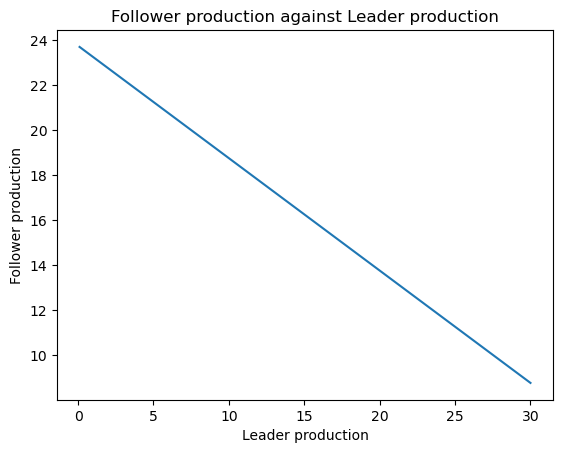

In [32]:
xs = np.linspace(0.1,30,100) #plotting a figure showing how follower production change with different level of leader's production
x_follow = np.empty(100)

for i,x in enumerate(xs):
    x_follow[i] = follower_opt(x,a,b,c)

fig = plt.figure()
plt.plot(xs,x_follow)
plt.xlabel("Leader production")
plt.ylabel("Follower production")
plt.title("Follower production against Leader production")
plt.show()

The greater the leader's production is, the smaller follower'production level will be.

# Further analysis

**PRODUCTION AND PROFITS' CHANGES WITH DIFFERENT PARAMETER'S VALUES**

In [33]:
def lists(a1,a2,b,c): #solving the model changing a-parameter in the range a1-a2 and saving results in lists
    q1_list = []
    q2_list = []
    pi1_list = []
    pi2_list = []
    a_list = []

    for a in range(a1,a2):
        a_list.append(a)
        q1_list.append(q1_func(a,b,c))
        q2_list.append(q2_func(a,b,c))
        pi1_list.append(pi1_func(a,b,c))
        pi2_list.append(pi2_func(a,b,c))
    return a_list,q1_list,q2_list,pi1_list,pi2_list

def figure(b,c): #plotting function
    a1=1
    a2=80
    a_list,q1_list,q2_list,pi1_list,pi2_list = lists(a1,a2,b,c)

    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1,1,1, label="ax1")
    plt.plot(a_list, q1_list, label="Leader Frim")
    plt.plot(a_list, q2_list, "--", label="Follower Firm")
    plt.legend()
    plt.xlabel("a-parameter")
    plt.ylabel("q, goods produced")
    plt.ylim(0,6)
    plt.grid(linestyle="--", linewidth="0.5")
    plt.title("Optimal production as a function of a")

    fig2 = plt.figure()
    ax2 = fig2.add_subplot(1,1,1, label="ax2")
    plt.plot(a_list, pi1_list, label="Leader Firm")
    plt.plot(a_list, pi2_list, "--", label="Follower Firm")
    plt.legend()
    plt.xlabel("a-parameter")
    plt.ylabel("pi, profits")
    plt.ylim(0,32)
    plt.grid(linestyle="--", linewidth="0.5")
    plt.title("Optimal profit as a function of a")
    #Show plots
    plt.show()

#creating silider widget for b a c parameters
slider1 =widgets.FloatSlider(min=1.0, max=15.0, step=1, value=2.0)
slider2 =widgets.FloatSlider(min=1.0, max=20.0, step=1, value=5.0)
widgets.interact(figure,b=slider1, c=slider2) #plotting

interactive(children=(FloatSlider(value=2.0, description='b', max=15.0, min=1.0, step=1.0), FloatSlider(value=…

<function __main__.figure(b, c)>

**Even in this graphs we can note that leader firm's production and profits will be greater then followers due to the first move advantage.**

The greater **a** is the greater production level and profits will be. Greater values of **b** reduce both production and profits. Since **c** is the marginal cost, bigger values of the parameters will return smaller values of production and profit.

**SOLVING STACKELBERG MODEL WITH 3 FIRMS**

Now I solve Satckelberg model with three firms. In this case the leader will choose first its optimal production level knowing how the two followers will react. The first follower will choose its production level after the leader knowing how the last follower will react. Lastly, follower number 2 will choose its production level maximizing profit.

In [34]:
a=100
b=2
c=5
_sol_leader, sol_follower1, sol_follower2 = leader_opt_(a,b,c) #I solve the 3-firms Stackelberg model calling leader_opt_() function which can be found in the .py file
#printing
print(f'Leader production:{_sol_leader}')
print(f'Follower 1 production:{sol_follower1}')
print(f'Follower 2 production:{sol_follower2}')

Leader production:21.108532814838345
Follower 1 production:10.556586914062503
Follower 2 production:9.722866665738595


Due to the first move advantage we see that laeder production will be greater than follower 1's production and follower 1's production will be greater than follower 2's production

# Conclusion

I solved Stackelberg model in the following ways:
* Analytically (with partameter test)
* Numerically (duopoly)
* Numerically (3-firms)